In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/samch/spark-3.3.0-bin-hadoop3')
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
spark = SparkSession.builder.appName('722-a4').getOrCreate()

PermissionError: [Errno 13] Permission denied: '/home/samch/spark-3.3.0-bin-hadoop3/./bin/spark-submit'

In [11]:
# Importing data which has a header. Schema is automatically configured.
df = spark.read.csv('master.csv', header=True, inferSchema=True)

# Let's see the data. You'll notice nulls.
df.show()

+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+------------------+------------------+---------------+
|country|year|   sex|        age|suicides_no|population|suicides/100k pop|country-year|HDI for year| gdp_for_year ($) |gdp_per_capita ($)|     generation|
+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+------------------+------------------+---------------+
|Albania|1987|  male|15-24 years|         21|    312900|             6.71| Albania1987|        null|     2,156,624,900|               796|   Generation X|
|Albania|1987|  male|35-54 years|         16|    308000|             5.19| Albania1987|        null|     2,156,624,900|               796|         Silent|
|Albania|1987|female|15-24 years|         14|    289700|             4.83| Albania1987|        null|     2,156,624,900|               796|   Generation X|
|Albania|1987|  male|  75+ years|          1|     21800|             4

In [12]:
# But what about data type?
df.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides_no: integer (nullable = true)
 |-- population: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- country-year: string (nullable = true)
 |-- HDI for year: double (nullable = true)
 |--  gdp_for_year ($) : string (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: string (nullable = true)



In [13]:
# Display the columns
df.columns

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [14]:
df.describe(['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop']).show()

+-------+----------+------------------+------+-----------+------------------+------------------+------------------+
|summary|   country|              year|   sex|        age|       suicides_no|        population| suicides/100k pop|
+-------+----------+------------------+------+-----------+------------------+------------------+------------------+
|  count|     27820|             27820| 27820|      27820|             27820|             27820|             27820|
|   mean|      null|2001.2583752695903|  null|       null|242.57440690150972|1844793.6173975556|12.816097411933894|
| stddev|      null| 8.469055024441408|  null|       null| 902.0479168336403|3911779.4417563565| 18.96151101450326|
|    min|   Albania|              1985|female|15-24 years|                 0|               278|               0.0|
|    max|Uzbekistan|              2016|  male|  75+ years|             22338|          43805214|            224.97|
+-------+----------+------------------+------+-----------+--------------

In [15]:
 df.describe(['country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']).show()

+-------+--------------+-------------------+------------------+------------------+----------+
|summary|  country-year|       HDI for year| gdp_for_year ($) |gdp_per_capita ($)|generation|
+-------+--------------+-------------------+------------------+------------------+----------+
|  count|         27820|               8364|             27820|             27820|     27820|
|   mean|          null| 0.7766011477761785|              null|16866.464414090584|      null|
| stddev|          null|0.09336670859029984|              null|18887.576472205576|      null|
|    min|   Albania1987|              0.483| 1,002,219,052,968|               251|   Boomers|
|    max|Uzbekistan2014|              0.944|       997,007,926|            126352|    Silent|
+-------+--------------+-------------------+------------------+------------------+----------+



In [16]:
data = df.toPandas()

In [17]:
data_1 = data.copy()
for index_label, row_series in data_1.iterrows():
    data_1.at[index_label , ' gdp_for_year ($) '] = row_series[' gdp_for_year ($) '].replace(',','')

data_1[' gdp_for_year ($) '] = pd.to_numeric(data_1[' gdp_for_year ($) '])

In [18]:
coding_schema = ['country', 'year', 'sex', 'age', 'country-year', 'generation']
for code in coding_schema:
    print(data[code].astype('category'))

0           Albania
1           Albania
2           Albania
3           Albania
4           Albania
            ...    
27815    Uzbekistan
27816    Uzbekistan
27817    Uzbekistan
27818    Uzbekistan
27819    Uzbekistan
Name: country, Length: 27820, dtype: category
Categories (101, object): ['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', ..., 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan']
0        1987
1        1987
2        1987
3        1987
4        1987
         ... 
27815    2014
27816    2014
27817    2014
27818    2014
27819    2014
Name: year, Length: 27820, dtype: category
Categories (32, int64): [1985, 1986, 1987, 1988, ..., 2013, 2014, 2015, 2016]
0          male
1          male
2        female
3          male
4          male
          ...  
27815    female
27816    female
27817      male
27818    female
27819    female
Name: sex, Length: 27820, dtype: category
Categories (2, object): ['female', 'male']
0        15-24 years
1        35-54 years
2     

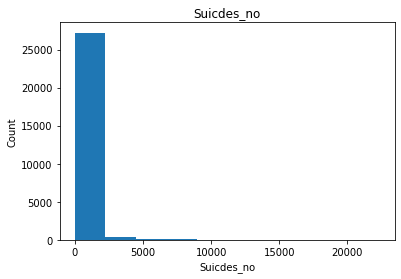

In [19]:
import matplotlib.pyplot as plt

#Section 2.3
plt.hist(data['suicides_no'])
plt.title("Suicdes_no")
plt.xlabel("Suicdes_no")
plt.ylabel("Count")
plt.show()

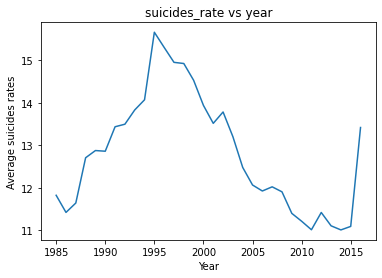

In [20]:
plot_dt = data.groupby("year")['suicides/100k pop'].mean().reset_index()
plt.plot(plot_dt.iloc[:, 0], plot_dt.iloc[:, 1])
plt.title("suicides_rate vs year")
plt.xlabel("Year")
plt.ylabel("Average suicides rates")
plt.show()

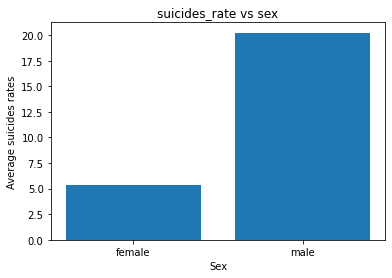

In [21]:
plot_dt = data.groupby("sex")['suicides/100k pop'].mean().reset_index()
plt.bar(plot_dt.iloc[:, 0], plot_dt.iloc[:, 1])
plt.title("suicides_rate vs sex")
plt.xlabel("Sex")
plt.ylabel("Average suicides rates")
plt.show()

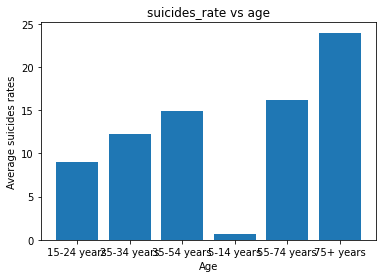

In [22]:
plot_dt = data.groupby("age")['suicides/100k pop'].mean().reset_index()
plt.bar(plot_dt.iloc[:, 0], plot_dt.iloc[:, 1])
plt.title("suicides_rate vs age")
plt.xlabel("Age")
plt.ylabel("Average suicides rates")
plt.show()

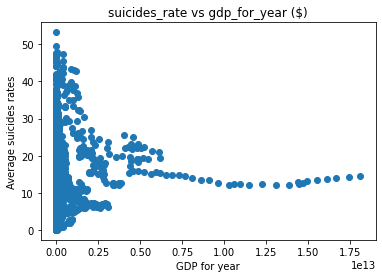

In [23]:
plot_dt = data_1.groupby(" gdp_for_year ($) ")['suicides/100k pop'].mean().reset_index().sort_values(by=[' gdp_for_year ($) '])
plt.scatter(plot_dt.iloc[:, 0], plot_dt.iloc[:, 1])
plt.title("suicides_rate vs gdp_for_year ($)")
plt.xlabel("GDP for year")
plt.ylabel("Average suicides rates")
plt.show()

In [24]:
from pyspark.sql import functions as f
def find_outliers(df):

    # Identifying the numerical columns in a spark dataframe
    numeric_columns = [column[0] for column in df.dtypes if column[1]=='int']

    # Using the `for` loop to create new columns by identifying the outliers for each feature
    for column in numeric_columns:

        less_Q1 = 'less_Q1_{}'.format(column)
        more_Q3 = 'more_Q3_{}'.format(column)
        Q1 = 'Q1_{}'.format(column)
        Q3 = 'Q3_{}'.format(column)

        # Q1 : First Quartile ., Q3 : Third Quartile
        Q1 = df.approxQuantile(column,[0.25],relativeError=0)
        Q3 = df.approxQuantile(column,[0.75],relativeError=0)
        
        # IQR : Inter Quantile Range
        # We need to define the index [0], as Q1 & Q3 are a set of lists., to perform a mathematical operation
        # Q1 & Q3 are defined seperately so as to have a clear indication on First Quantile & 3rd Quantile
        IQR = Q3[0] - Q1[0]
        
        #selecting the data, with -1.5*IQR to + 1.5*IQR., where param = 1.5 default value
        less_Q1 =  Q1[0] - 1.5*IQR
        more_Q3 =  Q3[0] + 1.5*IQR
        
        isOutlierCol = 'is_outlier_{}'.format(column)
        
        df = df.withColumn(isOutlierCol,f.when((df[column] > more_Q3) | (df[column] < less_Q1), 1).otherwise(0))
    

    # Selecting the specific columns which we have added above, to check if there are any outliers
    selected_columns = [column for column in df.columns if column.startswith("is_outlier")]

    # Adding all the outlier columns into a new colum "total_outliers", to see the total number of outliers
    df = df.withColumn('total_outliers',sum(df[column] for column in selected_columns))

    # Dropping the extra columns created above, just to create nice dataframe., without extra columns
    df = df.drop(*[column for column in df.columns if column.startswith("is_outlier")])

    return df

In [ ]:
outliers = find_outliers(df)
outliers = outliers.filter(outliers['total_Outliers']>=1)
outliers.show()

In [ ]:
outliers.describe(['total_Outliers']).show()

In [ ]:
df_2 = df.drop('suicides_no', 'country-year' , 'population')
df_2.columns

In [ ]:
df_2 = df_2.na.drop()
df_2.describe().show()

In [ ]:
df_3=spark.createDataFrame(data_1) 
df_3.head()

In [ ]:
df_3 = df_3.drop('suicides_no', 'country-year' , 'population', 'HDI for year')
df_3.columns

In [ ]:
df_3.printSchema()

In [ ]:
from pyspark.sql.types import DoubleType
df_4 = df_3.withColumn(" gdp_for_year ($) ", df_3[" gdp_for_year ($) "].cast(DoubleType()))
df_4 = df_4.withColumn("gdp_per_capita ($)", df_3["gdp_per_capita ($)"].cast(DoubleType()))
df_4.printSchema()

In [ ]:
df_4.show()

In [ ]:
df_4.describe().show()

In [ ]:
from pyspark.sql import functions as F
df_5 = df_4.withColumn(
    'suicides_risk',
    F.when(F.col('suicides/100k pop') > 14, 'high')\
    .when(F.col('suicides/100k pop') < 5, 'low')\
    .otherwise('medium')
)
df_5.show()

In [ ]:
df_5 = df_5.withColumn(
    'developed_country',
    F.when(F.col('gdp_per_capita ($)') < 25000, 'undeveloped')\
    .otherwise('developed')
)
df_5.show()

In [ ]:
df_5.printSchema() 

In [ ]:
df_5 = df_5.withColumnRenamed(" gdp_for_year ($) ","gdp_yearly")
df_5 = df_5.withColumnRenamed("suicides/100k pop","suicides_rate")
df_5 = df_5.withColumnRenamed("gdp_per_capita ($)","gdp_per_capita")
df_5.printSchema()

In [ ]:
# Demonstration of data integration - Preparation
data_a = data.iloc[:, :6]
data_b = data.iloc[:, -6:]
data_a.to_csv("data_a.csv")
data_b.to_csv("data_b.csv")

In [ ]:
df_a = pd.read_csv("data_a.csv")
df_b = pd.read_csv("data_b.csv")

In [ ]:
merged = df_a.merge(df_b)
ps_merged = spark.createDataFrame(merged)
ps_merged.columns

In [ ]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
sex_indexer = StringIndexer(inputCol='sex',outputCol='sexIndex')
sex_indexed = sex_indexer.fit(df_5).transform(df_5)

